In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('results_b.csv',
                 names=['model name',
                        'num black',
                        'num white',
                        'num total',
                        'true theta_0',
                        'true theta_1',
                        'pred theta_0',
                        'pred theta_1',
                        'err', 
                        'acc'])

In [4]:
# Function to extract values from model name
def extract_values(model_name):
    parts = model_name.split('_')
    alpha, beta0, beta1 = parts[1], parts[2], parts[3]
    return float(alpha), float(beta0), float(beta1)

# Applying the function to the dataframe
df['model alpha'], df['model beta_0'], df['model beta_1'] = zip(*df['model name'].apply(extract_values))

In [5]:
df = df.astype({'model alpha': 'float',
                'model beta_0': 'float',
                'model beta_1':'float',
                'num black': 'int',
                'num white': 'int',
                'num total': 'int',
                'true theta_0': 'float',
                'true theta_1': 'float',
                'pred theta_0': 'float',
                'pred theta_0': 'float',
                'err': 'float',
                'acc': 'float'})

In [6]:
df

,model name,num black,num white,num total,true theta_0,true theta_1,pred theta_0,pred theta_1,err,acc,model alpha,model beta_0,model beta_1
0,a_0.5_0.2_0.8_0,1,0,1,1.0,0.0,0.500888,0.499112,0.499112,0.500888,0.5,0.2,0.8
1,a_0.5_0.2_0.8_0,0,1,1,0.0,1.0,0.270575,0.729425,0.270575,0.729425,0.5,0.2,0.8
2,a_0.5_0.2_0.8_0,2,0,2,1.0,0.0,0.611501,0.388499,0.388499,0.611501,0.5,0.2,0.8
3,a_0.5_0.2_0.8_0,0,2,2,0.0,1.0,0.178180,0.821820,0.178180,0.821820,0.5,0.2,0.8
4,a_0.5_0.2_0.8_0,10,0,10,1.0,0.0,0.968191,0.031809,0.031809,0.968191,0.5,0.2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,a_10.0_0.8_0.2_0,4,1,5,0.8,0.2,0.838475,0.161525,0.038475,0.961525,10.0,0.8,0.2
230,a_10.0_0.8_0.2_0,2,8,10,0.2,0.8,0.426163,0.573837,0.226163,0.773837,10.0,0.8,0.2
231,a_10.0_0.8_0.2_0,8,2,10,0.8,0.2,0.801396,0.198604,0.001396,0.998604,10.0,0.8,0.2
232,a_10.0_0.8_0.2_0,4,16,20,0.2,0.8,0.320597,0.679403,0.120597,0.879403,10.0,0.8,0.2


In [9]:
# Exclude specific num_black and num_white combinations
excluded_combinations = [
    (20, 20), (10, 11), (11, 10), 
    (1, 4), (4, 1), (2, 8), (8, 2), (4, 16), (16, 4)
]
df = df[~df[['num black', 'num white']].apply(tuple, axis=1).isin(excluded_combinations)]


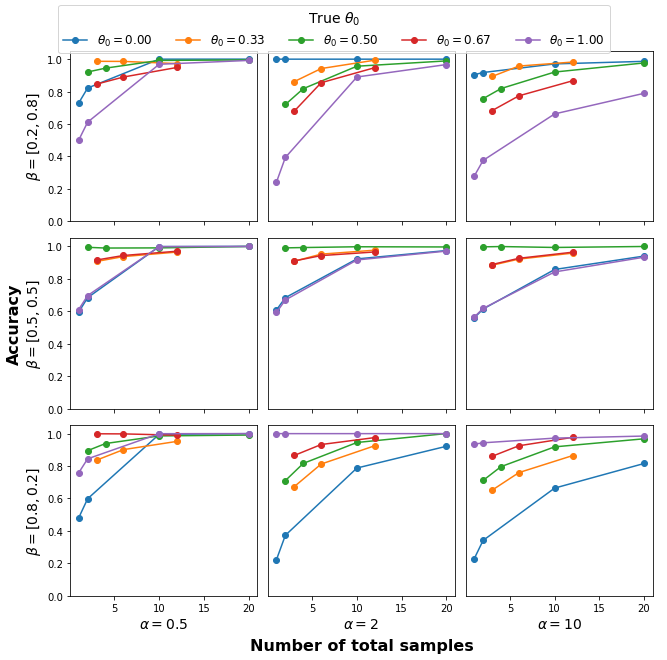

In [10]:
# Assuming df is already loaded and filtered from previous steps

# Set up the plot - 3 rows for beta combinations, 3 columns for alpha values
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Define the order of alpha and beta values for plotting
alpha_order = [0.5, 2, 10]
beta_order = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]

# Storage for legend handles and labels
handles_list = []
labels_list = []

# Iterate over each subplot position
for i, alpha in enumerate(alpha_order):
    for j, beta in enumerate(beta_order):
        ax = axes[j, i]

        # Filter the dataframe for the current alpha and beta combination
        current_df = df[(df['model alpha'] == alpha) & 
                        (df['model beta_0'] == beta[0]) & 
                        (df['model beta_1'] == beta[1])]

        # Check if there is data to plot
        if not current_df.empty:
            # Plot 'num total' vs 'acc' for each 'true theta_0' value in this group
            for theta in sorted(current_df['true theta_0'].unique()):
                subset = current_df[current_df['true theta_0'] == theta]
                line, = ax.plot(subset['num total'], subset['acc'], marker='o', label=f'{theta:.2f}')
                # Save the handle for legend
                if ax is axes[0, 0]:  # Only add one set of handles
                    handles_list.append(line)
                    labels_list.append(f'$\\theta_0={theta:.2f}$')
            
            # Set title for the bottom side of the plot
            if j == 2:
                ax.set_xlabel(f'$\\alpha = {alpha}$', fontsize=14)
            # Set title for the left side of the plot
            if i == 0:
                ax.set_ylabel(f'$\\beta = [{beta[0]},{beta[1]}]$', fontsize=14)

        # Remove y-axis ticks for the 2nd and 3rd columns
        if i in [1, 2]:
            ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# Set the y-axis limits to be the same for each row
for ax in axes.flatten():
    ax.set_ylim(0, 1.05)  # Assuming accuracy is between 0 and 1

# Create a big subplot
fig.add_subplot(111, frameon=False)
# Hide tick and tick label of the big subplot
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# Set the common labels
plt.xlabel('Number of total samples', labelpad=25, fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', labelpad=25, fontsize=16, fontweight='bold')

# Create combined legend at the top of the graph
legend = fig.legend(handles=handles_list, labels=labels_list, loc='upper center', ncol=len(handles_list), title='True $\\theta_0$', fontsize=12, title_fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the rect so the titles will fit
plt.show()
